In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time

In [2]:
cd C:\Users\dminc\Data

C:\Users\dminc\Data


In [3]:
data = pd.read_csv('column_2C_weka.csv')

In [4]:
# Normalize data
from sklearn import preprocessing
data_copy = data.loc[:, data.columns != 'class']
normal_data = preprocessing.normalize(data_copy)

In [5]:
data.loc[data['class'] == 'Abnormal', 'Class'] = 1
data.loc[data['class'] == 'Normal', 'Class'] = 0

In [6]:
data.drop(['class'], axis=1, inplace = True)

In [7]:
X, y = normal_data[:], data.loc[:, 'Class']

In [8]:
# Dict for each model
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': range(1,11,1),
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': range(40,160,10),
            'criterion': ['gini', 'entropy'],
            'max_depth': range(10,160,10)
        }
    },
    'dtree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': range(10,160,10)
        }
        
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': range(1,11,1),
            'algorithm': ['ball_tree', 'kd_tree', 'brute'],
            'weights': ['uniform', 'distance']
        }
    }
}

In [9]:
# Check params
mod = KNeighborsClassifier()
from pprint import pprint
# Look at parameters
print('Parameters currently in use:\n')
pprint(mod.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [10]:
# Cross-validation
start_time = time.time()

from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], 
                       cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
print("--- %s seconds ---" % (time.time() - start_time))

--- 224.81304621696472 seconds ---


In [11]:
# Single core computing took 224.8 seconds
# further test on full cpu load - parallel computing

In [12]:
# Result
import pandas as pd
data_result = pd.DataFrame(scores, columns=['model','best_score','best_params'])
pd.options.display.max_colwidth = 100
data_result

,model,best_score,best_params
0,svm,0.761290,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.800000,"{'criterion': 'gini', 'max_depth': 130, 'n_estimators': 50}"
2,dtree,0.806452,"{'criterion': 'entropy', 'max_depth': 60, 'splitter': 'best'}"
3,knn,0.774194,"{'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'uniform'}"


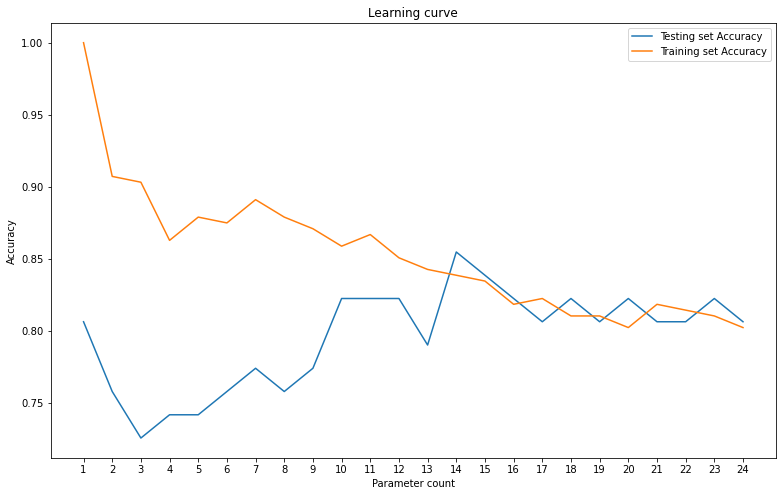

Max accuracy is 0.8548387096774194 with K = 14


In [30]:
# Test
# Learning curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 42)

a = range(1,25,1)
train_accuracy = []
test_accuracy = []

for k in iter(a):
    knn = KNeighborsClassifier(n_neighbors = k, algorithm = 'ball_tree')
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.figure(figsize = [13, 8])
plt.plot(a, test_accuracy, label = 'Testing set Accuracy')
plt.plot(a, train_accuracy, label = 'Training set Accuracy')
plt.legend()
plt.title('Learning curve')
plt.xlabel('Parameter count')
plt.ylabel('Accuracy')
plt.xticks(a)
plt.savefig('learningK.png')
plt.show()
print("Max accuracy is {} with K = {}".format(np.max(test_accuracy), 
                                        1+test_accuracy.index(np.max(test_accuracy))))

In [13]:
# Interpret learning curve
# train/test converge: early = high bias; late or no converge = high variance